#2 Scalable Learning in Scikit-learn

## Datasets for trying yourself the real thing

In [1]:
import urllib2 # import urllib.request as urllib2 in Python3
import requests, io, os, StringIO
import numpy as np
import tarfile, zipfile, gzip

def unzip_from_UCI(UCI_url, dest=''):
    """
    Downloads and unpacks datasets from UCI in zip format
    """
    response = requests.get(UCI_url)
    compressed_file = io.BytesIO(response.content)
    z = zipfile.ZipFile(compressed_file)
    print ('Extracting in %s' %  os.getcwd()+'\\'+dest)
    for name in z.namelist():
        if '.csv' in name:
            print ('\tunzipping %s' %name)
            z.extract(name, path=os.getcwd()+'\\'+dest)

def gzip_from_UCI(UCI_url, dest=''):
    """
    Downloads and unpacks datasets from UCI in gzip format
    """
    response = urllib2.urlopen(UCI_url)
    compressed_file = io.BytesIO(response.read())
    decompressed_file = gzip.GzipFile(fileobj=compressed_file)
    filename = UCI_url.split('/')[-1][:-3]
    with open(os.getcwd()+'\\'+filename, 'wb') as outfile:
        outfile.write(decompressed_file.read())
    print ('File %s decompressed' % filename)
            
def targzip_from_UCI(UCI_url, dest='.'):
    """
    Downloads and unpacks datasets from UCI in tar.gz format
    """
    response = urllib2.urlopen(UCI_url)
    compressed_file = StringIO.StringIO(response.read())
    tar = tarfile.open(mode="r:gz", fileobj = compressed_file)
    tar.extractall(path=dest)
    datasets = tar.getnames()
    for dataset in datasets:
        size = os.path.getsize(dest+'\\'+dataset)
        print ('File %s is %i bytes' % (dataset,size))
    tar.close()

def load_matrix(UCI_url):
    """
    Downloads datasets from UCI in matrix form
    """
    return np.loadtxt(urllib2.urlopen(UCI_url))

###Bike Sharing Dataset Data Set

In [2]:
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
unzip_from_UCI(UCI_url, dest='bikesharing')

Extracting in C:\scisoft\WinPython-64bit-2.7.9.4\notebooks\Packt - Large Scale CHECK\bikesharing
	unzipping day.csv
	unzipping hour.csv


In [3]:
import os, csv
local_path = os.getcwd()
source = 'bikesharing\\hour.csv'
SEP = ',' # We define this for being able to easily change it as required by the file
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.reader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        if n==0:
            header = row
        else:
            # DATA PROCESSING placeholder
            # MACHINE LEARNING placeholder
            pass
    print ('Total rows: %i' % (n+1))
    print ('Header: %s' % ', '.join(header))
    print ('Sample values: %s' % ', '.join(row))

Total rows: 17380
Header: instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Sample values: 17379, 2012-12-31, 1, 1, 12, 23, 0, 1, 1, 1, 0.26, 0.2727, 0.65, 0.1343, 12, 37, 49


In [4]:
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.DictReader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pass
    print ('Total rows: %i' % (n+1))
    print ('Sample values: %s' % str(row))

Total rows: 17379
Sample values: {'mnth': '12', 'cnt': '49', 'holiday': '0', 'instant': '17379', 'temp': '0.26', 'dteday': '2012-12-31', 'hr': '23', 'season': '1', 'registered': '37', 'windspeed': '0.1343', 'atemp': '0.2727', 'workingday': '1', 'weathersit': '1', 'weekday': '1', 'hum': '0.65', 'yr': '1', 'casual': '12'}


## Using pandas I/O tools

In [5]:
import pandas as pd
CHUNK_SIZE = 1000
with open(local_path+'\\'+source, 'rb') as R:
    iterator = pd.read_csv(R, chunksize=CHUNK_SIZE) 
    for n, data_chunk in enumerate(iterator):
        print ('Size of uploaded chunk: %i instances, %i features' % (data_chunk.shape))
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pass
    print ('Sample values: \n%s' % str(data_chunk.iloc[0]))

Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 379 instances, 17 features
Sample values: 
instant            17001
dteday        2012-12-16

## Working with databases

In [6]:
import os, sys
import sqlite3, csv,glob

SEP = ','

def define_field(s):
    try:
        int(s)
        return 'integer'
    except ValueError:
        try:
            float(s)
            return 'real'
        except:
            return 'text'

def create_sqlite_db(db='database.sqlite', file_pattern=''):
    conn = sqlite3.connect(db)
    conn.text_factory = str  # allows utf-8 data to be stored

    c = conn.cursor()

    # traverse the directory and process each .csv file useful for building the db
    target_files = glob.glob(file_pattern) 

    print ('Creating %i table(s) into %s from file(s): %s' % (len(target_files), db, ', '.join(target_files)))

    for k,csvfile in enumerate(target_files):
        # remove the path and extension and use what's left as a table name
        tablename = os.path.splitext(os.path.basename(csvfile))[0]

        with open(csvfile, "rb") as f:
            reader = csv.reader(f, delimiter=SEP)

            f.seek(0)
            for n,row in enumerate(reader):
                if n==11:
                    types = map(define_field,row)
                else:
                    if n>11:
                        break      

            f.seek(0)
            for n,row in enumerate(reader):
                if n==0:

                    sql = "DROP TABLE IF EXISTS %s" % tablename
                    c.execute(sql)
                    sql = "CREATE TABLE %s (%s)" % (tablename,
                              ", ".join([ "%s %s" % (col, ct) for col, ct  in zip(row, types)]))
                    print ('%i) %s' % (k+1,sql))
                    c.execute(sql)

                    # Creating indexes for faster joins on long strings
                    for column in row:
                        if column.endswith("_ID_hash"):
                            index = "%s__%s" % ( tablename, column )
                            sql = "CREATE INDEX %s on %s (%s)" % ( index, tablename, column )
                            c.execute(sql) 

                    insertsql = "INSERT INTO %s VALUES (%s)" % (tablename,
                                ", ".join([ "?" for column in row ]))

                    rowlen = len(row)
                else:
                    # raise an error if there are rows that don't have the right number of fields
                    if len(row) == rowlen:
                        c.execute(insertsql, row)
                    else:
                        print ('Error at line %i in file %s') % (n,csvfile)
                        raise ValueError('Houston, we\'ve had a problem at row %i' % n)

            conn.commit()
            print ('* Inserted %i rows' % n)

    c.close()
    conn.close()

In [7]:
create_sqlite_db(db='bikesharing.sqlite', file_pattern='bikesharing\\*.csv')

Creating 3 table(s) into bikesharing.sqlite from file(s): bikesharing\day.csv, bikesharing\hour.csv, bikesharing\shuffled_hour.csv
1) CREATE TABLE day (instant integer, dteday text, season integer, yr integer, mnth integer, holiday integer, weekday integer, workingday integer, weathersit integer, temp real, atemp real, hum real, windspeed real, casual integer, registered integer, cnt integer)
* Inserted 731 rows
2) CREATE TABLE hour (instant integer, dteday text, season integer, yr integer, mnth integer, hr integer, holiday integer, weekday integer, workingday integer, weathersit integer, temp real, atemp real, hum real, windspeed real, casual integer, registered integer, cnt integer)
* Inserted 17379 rows
3) CREATE TABLE shuffled_hour (instant integer, dteday text, season integer, yr integer, mnth integer, hr integer, holiday integer, weekday integer, workingday integer, weathersit integer, temp real, atemp real, hum real, windspeed real, casual integer, registered integer, cnt intege

In [8]:
import os, sqlite3
import pandas as pd

DB_NAME = 'bikesharing.sqlite'
DIR_PATH = os.getcwd()
CHUNK_SIZE = 2500

conn = sqlite3.connect(DIR_PATH+'\\'+DB_NAME)
conn.text_factory = str  # allows utf-8 data to be stored     
sql = "SELECT H.*, D.cnt AS day_cnt FROM hour AS H INNER JOIN day as D ON (H.dteday = D.dteday)"
DB_stream = pd.io.sql.read_sql(sql, conn, chunksize=CHUNK_SIZE)
for j,data_chunk in enumerate(DB_stream):
    print ('Chunk %i -' % (j+1)),
    print ('Size of uploaded chunk: %i istances, %i features' % (data_chunk.shape))
    # DATA PROCESSING placeholder
    # MACHINE LEARNING placeholder

Chunk 1 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 2 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 3 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 4 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 5 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 6 - Size of uploaded chunk: 2500 istances, 18 features
Chunk 7 - Size of uploaded chunk: 2379 istances, 18 features


## Paying caution to the ordering of instances

In [9]:
import zlib
from random import shuffle

def ram_shuffle(filename_in, filename_out, header=True):
    with open(filename_in, 'rb') as f:
        zlines = [zlib.compress(line, 9) for line in f]
        if header:
            first_row = zlines.pop(0)
    shuffle(zlines)
    with open(filename_out, 'wb') as f:
        if header:
            f.write(zlib.decompress(first_row))
        for zline in zlines:
            f.write(zlib.decompress(zline))

import os

local_path = os.getcwd()
source = 'bikesharing\\hour.csv'
ram_shuffle(filename_in=local_path+'\\'+source, \
                   filename_out=local_path+'\\bikesharing\\shuffled_hour.csv', header=True)

In [10]:
from random import shuffle
import pandas as pd
import numpy as np
import os

def disk_shuffle(filename_in, filename_out, header=True, iterations = 3, CHUNK_SIZE = 2500, SEP=','):
    for i in range(iterations):
        with open(filename_in, 'rb') as R:
            iterator = pd.read_csv(R, chunksize=CHUNK_SIZE) 
            for n, df in enumerate(iterator):
                if n==0 and header:
                    header_cols =SEP.join(df.columns)+'\n'
                df.iloc[np.random.permutation(len(df))].to_csv(str(n)+'_chunk.csv', index=False, header=False, sep=SEP)
        ordering = list(range(0,n+1))
        shuffle(ordering)
        with open(filename_out, 'wb') as W:
            if header:
                W.write(header_cols)
            for f in ordering:
                with open(str(f)+'_chunk.csv', 'r') as R:
                    for line in R:
                        W.write(line)
                os.remove(str(f)+'_chunk.csv')
        filename_in = filename_out
        CHUNK_SIZE = int(CHUNK_SIZE / 2)

import os

local_path = os.getcwd()
source = 'bikesharing\\hour.csv'
disk_shuffle(filename_in=local_path+'\\'+source, \
                   filename_out=local_path+'\\bikesharing\\shuffled_hour.csv', header=True)

## Feature management with data streams

In [11]:
import os, csv
local_path = os.getcwd()
source = 'bikesharing\\hour.csv'
SEP=','
running_mean = list()
running_std = list()
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.DictReader(R, delimiter=SEP)
    x = 0.0
    x_squared = 0.0
    for n, row in enumerate(iterator):
        temp = float(row['temp'])
        if n == 0:
            max_x, min_x = temp, temp
        else:
            max_x, min_x = max(temp, max_x),min(temp, min_x)
        x += temp
        x_squared += temp**2
        running_mean.append(x / (n+1))
        running_std.append(((x_squared - (x**2)/(n+1))/(n+1))**0.5)
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pass
    print ('Total rows: %i' % (n+1))
    print ('Feature \'temp\': mean=%0.3f, max=%0.3f, min=%0.3f,sd=%0.3f' \
           % (running_mean[-1], max_x, min_x, running_std[-1]))

Total rows: 17379
Feature 'temp': mean=0.497, max=1.000, min=0.020,sd=0.193


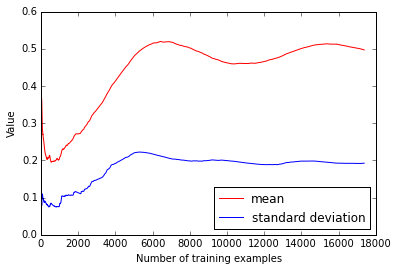

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(running_mean,'r-', label='mean')
plt.plot(running_std,'b-', label='standard deviation')
plt.ylim(0.0,0.6)
plt.xlabel('Number of training examples')
plt.ylabel('Value') 
plt.legend(loc='lower right', numpoints= 1)
plt.show()

## Describing the Covtype dataset


In [13]:
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'
gzip_from_UCI(UCI_url)

File covtype.data decompressed


In [14]:
import os, csv
local_path = os.getcwd()
source = 'covtype.data'
SEP=','
forest_type = {1:"Spruce/Fir", 2:"Lodgepole Pine", \
               3:"Ponderosa Pine", 4:"Cottonwood/Willow", \
               5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}
forest_type_count = {value:0 for value in forest_type.values()}
forest_type_count['Other'] = 0
lodgepole_pine = 0
spruce = 0
proportions = list()
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.reader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        response = int(row[-1]) # The response is the last value
        try:
            forest_type_count[forest_type[response]] +=1
            if response == 1:
                spruce += 1
            elif response == 2:
                lodgepole_pine +=1
            if n % 10000 == 0:
                proportions.append([spruce/float(n+1),\
                                    lodgepole_pine/float(n+1)])
        except:
            forest_type_count['Other'] += 1
    print ('Total rows: %i' % (n+1))
    print ('Frequency of classes:')
    for ftype, freq in sorted([(t,v) for t,v \
        in forest_type_count.iteritems()], key = \
        lambda x: x[1], reverse=True):
            print ("%-18s: %6i %04.1f%%" % \
                   (ftype, freq, freq*100/float(n+1)))


Total rows: 581012
Frequency of classes:
Lodgepole Pine    : 283301 48.8%
Spruce/Fir        : 211840 36.5%
Ponderosa Pine    :  35754 06.2%
Krummholz         :  20510 03.5%
Douglas-fir       :  17367 03.0%
Aspen             :   9493 01.6%
Cottonwood/Willow :   2747 00.5%
Other             :      0 00.0%


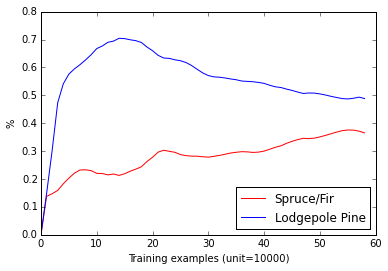

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
proportions = np.array(proportions)
plt.plot(proportions[:,0],'r-', label='Spruce/Fir')
plt.plot(proportions[:,1],'b-', label='Lodgepole Pine')
plt.ylim(0.0,0.8)
plt.xlabel('Training examples (unit=10000)')
plt.ylabel('%') 
plt.legend(loc='lower right', numpoints= 1)
plt.show()

## The hashing trick

In [16]:
from sklearn.feature_extraction.text import HashingVectorizer
h = HashingVectorizer(n_features=1000, binary=True, norm=None)
sparse_vector = h.transform(['A simple toy example will make clear how it works.'])
print(sparse_vector)

  (0, 61)	1.0
  (0, 271)	1.0
  (0, 287)	1.0
  (0, 452)	1.0
  (0, 462)	1.0
  (0, 539)	1.0
  (0, 605)	1.0
  (0, 726)	1.0
  (0, 918)	1.0


In [17]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=1000, non_negative=True)
example_row = {'numeric feature':3, 'another numeric feature':2, 'Categorical feature = 3':1, 'f1*f2*f3':1*2*3}
print (example_row)

{'another numeric feature': 2, 'f1*f2*f3': 6, 'numeric feature': 3, 'Categorical feature = 3': 1}


In [18]:
print (h.transform([example_row]))

  (0, 16)	2.0
  (0, 373)	1.0
  (0, 884)	6.0
  (0, 945)	3.0


## Other basis transformations

In [19]:
import numpy as np
v = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
vv = np.hstack((v, [v[i]*v[j] for i in range(len(v)) for j in range(i+1, len(v))]))

In [20]:
print vv

[ 1  2  3  4  5  6  7  8  9 10  2  3  4  5  6  7  8  9 10  6  8 10 12 14 16
 18 20 12 15 18 21 24 27 30 20 24 28 32 36 40 30 35 40 45 50 42 48 54 60 56
 63 70 72 80 90]


## Trying SGD in action

In [21]:
import os
local_path = os.getcwd()
source = 'covtype.data'
ram_shuffle(filename_in=local_path+'\\'+source, \
            filename_out=local_path+'\\shuffled_covtype.data', \
            header=False)

In [22]:
import csv, time
import numpy as np
from sklearn.linear_model import SGDClassifier
source = 'shuffled_covtype.data'
SEP=','
forest_type = [t+1 for t in range(7)]
SGD = SGDClassifier(loss='log', penalty=None, random_state=1, average=True)
accuracy = 0
holdout_count = 0
prog_accuracy = 0
prog_count = 0
cold_start = 200000
k_holdout = 10
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.reader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        if n > 250000: # Reducing the running time of the experiment
            break 
        # DATA PROCESSING
        response = np.array([int(row[-1])]) # The response is the last value
        features = np.array(map(float,row[:-1])).reshape(1,-1)
        # MACHINE LEARNIN
        if (n+1) >= cold_start and (n+1-cold_start) % k_holdout==0:
            if int(SGD.predict(features))==response[0]:
                accuracy += 1
            holdout_count += 1
            if (n+1-cold_start) % 25000 == 0 and (n+1) > cold_start:
                    print '%s holdout accuracy: %0.3f' % (time.strftime('%X'), accuracy / float(holdout_count))
        else:
            # PROGRESSIVE VALIDATION
            if (n+1) >= cold_start:
                if int(SGD.predict(features))==response[0]:
                    prog_accuracy += 1
                prog_count += 1
                if n % 25000 == 0 and n > cold_start:
                    print '%s progressive accuracy: %0.3f' % (time.strftime('%X'), prog_accuracy / float(prog_count))
            # LEARNING PHASE
            SGD.partial_fit(features, response, classes=forest_type)
print '%s FINAL holdout accuracy: %0.3f' % (time.strftime('%X'), accuracy / ((n+1-cold_start) / float(k_holdout)))
print '%s FINAL progressive accuracy: %0.3f' % (time.strftime('%X'), prog_accuracy / float(prog_count))

09:28:07 holdout accuracy: 0.614
09:28:07 progressive accuracy: 0.623
09:28:41 holdout accuracy: 0.614
09:28:41 progressive accuracy: 0.622
09:28:41 FINAL holdout accuracy: 0.614
09:28:41 FINAL progressive accuracy: 0.622


In [23]:
import csv, time, os
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.feature_extraction import FeatureHasher
source = '\\bikesharing\\hour.csv'
local_path = os.getcwd()
SEP=','
def apply_log(x): return np.log(float(x)+1)
def apply_exp(x): return np.exp(float(x))-1
SGD = SGDRegressor(loss='squared_loss', penalty=None, random_state=1, average=True)
h = FeatureHasher(non_negative=True)
val_rmse = 0
val_rmsle = 0
predictions_start = 16000
with open(local_path+'\\'+source, 'rb') as R:
    iterator = csv.DictReader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        # DATA PROCESSING
        target = np.array([apply_log(row['cnt'])])
        features = {k+'_'+v:1 for k,v in row.iteritems() \
            if k in ['holiday','hr','mnth','season', \
            'weathersit','weekday','workingday','yr']}
        numeric_features = {k:float(v) for k,v in \
           row.iteritems() if k in ['hum', 'temp', '\
           atemp', 'windspeed']}
        features.update(numeric_features)
        hashed_features = h.transform([features])
        # MACHINE LEARNING
        if (n+1) >= predictions_start:
            # HOLDOUT AFTER N PHASE
            predicted = SGD.predict(hashed_features)
            val_rmse += (apply_exp(predicted) \
                - apply_exp(target))**2
            val_rmsle += (predicted - target)**2
            if (n-predictions_start+1) % 250 == 0 \
                and (n+1) > predictions_start:
                print '%s holdout RMSE: %0.3f' \
                % (time.strftime('%X'), (val_rmse \
                / float(n-predictions_start+1))**0.5),
                print 'holdout RMSLE: %0.3f' % \
                 ((val_rmsle / float(n-predictions_start+1))**0.5)
        else:
            # LEARNING PHASE
            SGD.partial_fit(hashed_features, target)
print '%s FINAL holdout RMSE: %0.3f' % \
    (time.strftime('%X'), (val_rmse \
   / float(n-predictions_start+1))**0.5)
print '%s FINAL holdout RMSLE: %0.3f' % \
    (time.strftime('%X'), (val_rmsle \
   / float(n-predictions_start+1))**0.5)

09:31:23 holdout RMSE: 281.214 holdout RMSLE: 1.901
09:31:23 holdout RMSE: 255.092 holdout RMSLE: 1.803
09:31:23 holdout RMSE: 255.578 holdout RMSLE: 1.799
09:31:23 holdout RMSE: 254.598 holdout RMSLE: 1.816
09:31:23 holdout RMSE: 239.728 holdout RMSLE: 1.738
09:31:23 FINAL holdout RMSE: 229.154
09:31:23 FINAL holdout RMSLE: 1.679
